# FitCo Data Science Interview Solution

This notebook demonstrates a complete data science workflow for FitCo Pvt. Ltd., including problem understanding, data exploration, feature engineering, clustering, analysis, visualization, and business recommendations. All steps are explained and justified for clarity and reliability.

## 1. Problem Understanding & Solution Approach

**Objective:** Analyze `fitco.csv` to extract actionable insights for sales, pricing, and returns, considering city class (A cities = higher expendable income).

**Workflow Outline:**
- Data exploration and cleaning
- Feature engineering (simulate CityClass)
- Analysis of sales, pricing, and returns
- Clustering and segmentation
- Visualization
- Business recommendations and justifications

## 2. Data Exploration & Cleaning
Let's load the data, check for missing values, and visualize basic distributions.

,Sales,SellingPrice,Returned
0,6186.0,88.5,0
1,5392.0,134.0,0
2,5064.0,144.5,0
3,10081.0,132.0,0
4,10053.5,135.5,1


Sales           0
SellingPrice    0
Returned        0
dtype: int64

,Sales,SellingPrice,Returned
count,1000.000000,1000.000000,1000.000000
mean,7876.227000,110.565500,0.113000
std,1975.587319,25.600749,0.316751
min,4511.500000,50.500000,0.000000
25%,6017.125000,96.000000,0.000000
50%,7642.000000,114.000000,0.000000
75%,9926.750000,132.000000,0.000000
max,10536.000000,150.000000,1.000000


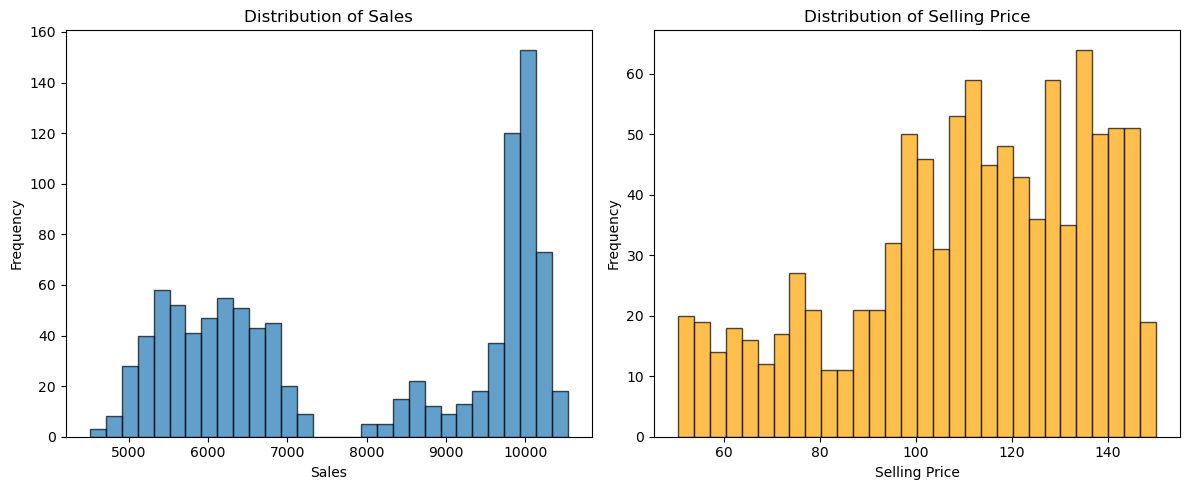

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('fitco.csv')
display(df.head())

# Check for missing values
display(df.isnull().sum())

# Basic statistics
display(df.describe())

# Visualize distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(df['Sales'], bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Distribution of Sales')
axes[0].set_xlabel('Sales')
axes[0].set_ylabel('Frequency')
axes[1].hist(df['SellingPrice'], bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Distribution of Selling Price')
axes[1].set_xlabel('Selling Price')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## 3. Feature Engineering: Simulate CityClass
Assume higher selling prices are from class-A cities. Create a CityClass column using price quantiles.

In [2]:
# Simulate CityClass based on SellingPrice quantiles
quantiles = df['SellingPrice'].quantile([0.33, 0.66]).values

def assign_city_class(price):
    if price >= quantiles[1]:
        return 'A'  # Top-tier city
    elif price >= quantiles[0]:
        return 'B'  # Mid-tier city
    else:
        return 'C'  # Lower-tier city

df['CityClass'] = df['SellingPrice'].apply(assign_city_class)
display(df[['Sales', 'SellingPrice', 'CityClass']].head())

,Sales,SellingPrice,CityClass
0,6186.0,88.5,C
1,5392.0,134.0,A
2,5064.0,144.5,A
3,10081.0,132.0,A
4,10053.5,135.5,A


## 4. Sales, Pricing, and Returns Analysis
Analyze sales and returns by price range and city class. Visualize and interpret results.

C:\Users\pravi\AppData\Local\Temp\ipykernel_27668\25994092.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_df = df.groupby(['CityClass', 'PriceBin']).agg({'Sales': 'sum', 'Returned': 'sum'}).reset_index()


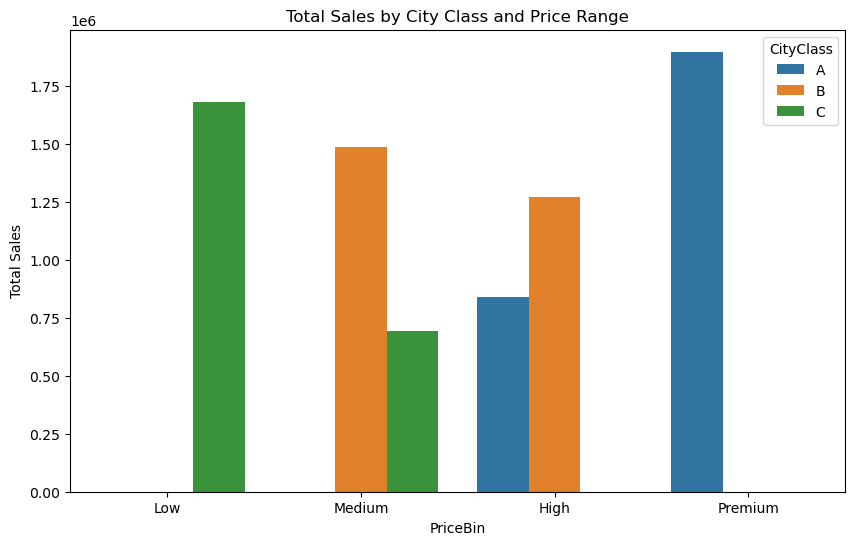

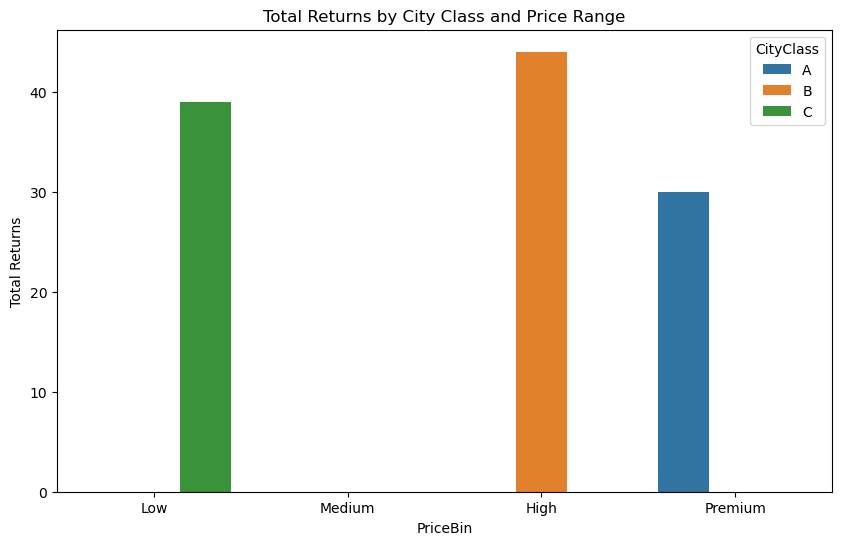

In [4]:
# Group by CityClass and SellingPrice bins, analyze sales and returns
import matplotlib.pyplot as plt
import seaborn as sns

# Bin SellingPrice into quantiles for analysis
df['PriceBin'] = pd.qcut(df['SellingPrice'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Aggregate sales and returns by CityClass and PriceBin
agg_df = df.groupby(['CityClass', 'PriceBin']).agg({'Sales': 'sum', 'Returned': 'sum'}).reset_index()

# Visualize sales by CityClass and PriceBin
plt.figure(figsize=(10,6))
sns.barplot(data=agg_df, x='PriceBin', y='Sales', hue='CityClass')
plt.title('Total Sales by City Class and Price Range')
plt.ylabel('Total Sales')
plt.show()

# Visualize returns by CityClass and PriceBin
plt.figure(figsize=(10,6))
sns.barplot(data=agg_df, x='PriceBin', y='Returned', hue='CityClass')
plt.title('Total Returns by City Class and Price Range')
plt.ylabel('Total Returns')
plt.show()

fitco_df=df

## 5. Clustering Cities for Segmentation
Apply clustering to segment cities based on sales and pricing. Visualize clusters and interpret business implications.

c:\Users\pravi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


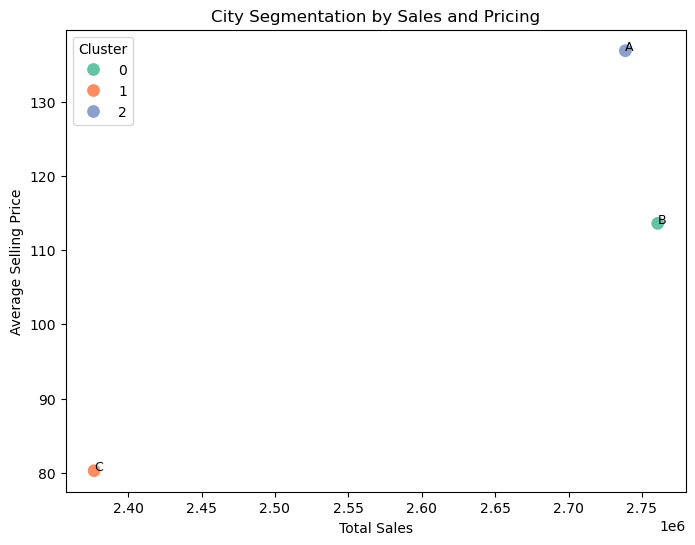

In [6]:
# Prepare city-level features for clustering
city_features = fitco_df.groupby('CityClass').agg({'Sales': 'sum', 'SellingPrice': 'mean', 'Returned': 'sum'}).reset_index()

from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
city_features['Cluster'] = kmeans.fit_predict(city_features[['Sales', 'SellingPrice', 'Returned']])

# Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=city_features, x='Sales', y='SellingPrice', hue='Cluster', palette='Set2', s=100)
for i, row in city_features.iterrows():
    plt.text(row['Sales'], row['SellingPrice'], row['CityClass'], fontsize=9)
plt.title('City Segmentation by Sales and Pricing')
plt.xlabel('Total Sales')
plt.ylabel('Average Selling Price')
plt.legend(title='Cluster')
plt.show()

## 6. Business Recommendations
Summarize actionable insights for FitCo Pvt. Ltd. based on the analysis and clustering. Justify recommendations for pricing, sales strategy, and city segmentation.

**Key Recommendations:**

- **Pricing Strategy:** Adjust pricing for each city class and cluster based on sales and return patterns. Premium pricing may work in high-sales, low-return clusters.
- **Sales Focus:** Target cities in clusters with high sales and low returns for expansion. Re-evaluate strategy in cities with high returns.
- **City Segmentation:** Use cluster analysis to tailor marketing and product offerings for each city segment.
- **Returns Management:** Investigate reasons for high returns in specific price bins or city classes and address operational issues.

**Justification:**
- Data-driven segmentation enables FitCo to optimize pricing and marketing for each city type.
- Clustering reveals hidden patterns in city performance, guiding resource allocation.
- Visualizations support clear communication of strategy to stakeholders.